### IDs:
Insert yours IDs to the cell below

ID #1: 807724

ID #2: 032480253

### 1 - Pre-processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
df = pd.read_csv("AMI_GSE66360_series_matrix.csv",index_col=0,skiprows=59, header=None, encoding="iso_8859_1")
df.head(3)

C:\Users\micae\AppData\Local\Temp\ipykernel_24464\4232399634.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AMI_GSE66360_series_matrix.csv",index_col=0,skiprows=59, header=None, encoding="iso_8859_1")


,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
ID_REF,GSM1620819,GSM1620820,GSM1620821,GSM1620822,GSM1620823,GSM1620824,GSM1620825,GSM1620826,GSM1620827,GSM1620828,...,GSM1620908,GSM1620909,GSM1620910,GSM1620911,GSM1620912,GSM1620913,GSM1620914,GSM1620915,GSM1620916,GSM1620917
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944


In [3]:
# Drop row ID_REF to fix mix type issue
df = df.drop("ID_REF",axis=0)
df.head(3)

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352


### 2 - Analysis
#### a. High level description of the data and some pre-processing:
1. How many genes profiled?

In [4]:
num_genes = len(df.axes[0])-1
num_genes

54675

2. How many samples (subjects/patients) in total?

In [5]:
num_patients = len(df.axes[1])
num_patients

99

3. How many samples in each class?

In [6]:
num_h = df.loc["Class"].value_counts()["H"]
num_m = df.loc["Class"].value_counts()["M"]
print(f"Number of healthy samples: {num_h}\nNumber of myocardial samples: {num_m}")

Number of healthy samples: 50
Number of myocardial samples: 49


4. If there are missing values, then remove the entire row (gene) from the data matrix. How many rows left now?

In [7]:
# Check if there are missing values
df.isnull().sum()

1     1
2     1
3     0
4     1
5     1
     ..
95    0
96    0
97    0
98    0
99    1
Length: 99, dtype: int64

In [8]:
# Drop rows with missing values
df = df.dropna(axis=0)

In [9]:
df.isna().count()

1     54629
2     54629
3     54629
4     54629
5     54629
      ...  
95    54629
96    54629
97    54629
98    54629
99    54629
Length: 99, dtype: int64

Hence, there are 54629 rows left after dropping null rows (this final amount includes "Class" row).

5. Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

In [10]:
# Select 20 random genes
np.random.seed(100)
sample = df.sample(n = 20)
sample

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
221147_x_at,4.951372,5.381638,5.134827,5.190878,4.814177,5.501576,5.354344,5.470132,4.600419,5.212096,...,5.278451,5.232833,5.510441,5.430937,5.952915,5.805735,5.218166,4.628534,5.477435,6.861232
230118_at,6.187663,6.199103,6.331865,6.129307,5.966526,5.58577,6.140924,5.777248,5.682087,6.59181,...,4.848287,5.167394,6.098631,5.554744,5.958966,5.131186,5.243345,5.276061,7.066386,5.537634
219396_s_at,7.20587,6.735352,7.380327,7.203819,7.218159,7.715648,7.127028,8.244825,8.037497,7.441875,...,7.008691,6.29949,7.155959,7.9414,7.746996,5.915327,6.472551,7.262919,7.288452,6.364751
241125_at,5.150379,5.522348,5.452252,5.444583,5.486554,5.166369,5.525715,5.145984,5.310229,5.338099,...,5.558057,5.652949,6.203806,5.37014,6.2252,5.300088,5.666616,5.862261,5.36357,6.068377
207550_at,5.957924,5.411176,3.563173,4.209382,5.014463,3.620198,4.42095,4.98835,5.974126,4.818589,...,5.849575,5.449226,7.032028,4.104781,4.902944,3.867202,5.267383,3.011703,4.396785,4.568446
216927_at,3.979668,3.97123,4.264382,4.126418,4.538962,4.040476,4.27749,4.249811,4.185986,4.092234,...,4.276519,4.087932,4.65408,4.351953,4.666803,5.798554,4.534792,4.879388,3.980231,4.723447
232568_at,4.643768,5.214565,5.262076,5.393617,3.867833,4.589086,5.637151,6.161441,3.874623,6.682902,...,3.709112,3.375886,8.784784,6.180331,7.717882,6.232065,7.024952,4.942609,3.16787,4.703247
224059_s_at,5.521306,5.803489,5.573356,5.885864,5.783932,5.881227,5.86935,6.217114,5.79573,5.739669,...,5.935095,5.555674,6.144844,5.612703,7.126337,6.69653,6.716683,6.345029,5.602776,6.361384
219353_at,10.34701,9.40107,8.725382,9.920418,9.179225,9.104292,8.765454,9.303748,9.399442,8.960306,...,9.439128,8.642946,6.610232,8.759423,7.713575,6.970828,8.795209,7.898014,9.720951,9.640234


In [11]:
sample = sample.append(df.loc["Class"])
sample

C:\Users\micae\AppData\Local\Temp\ipykernel_24464\2959813826.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample.append(df.loc["Class"])


,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
221147_x_at,4.951372,5.381638,5.134827,5.190878,4.814177,5.501576,5.354344,5.470132,4.600419,5.212096,...,5.278451,5.232833,5.510441,5.430937,5.952915,5.805735,5.218166,4.628534,5.477435,6.861232
230118_at,6.187663,6.199103,6.331865,6.129307,5.966526,5.58577,6.140924,5.777248,5.682087,6.59181,...,4.848287,5.167394,6.098631,5.554744,5.958966,5.131186,5.243345,5.276061,7.066386,5.537634
219396_s_at,7.20587,6.735352,7.380327,7.203819,7.218159,7.715648,7.127028,8.244825,8.037497,7.441875,...,7.008691,6.29949,7.155959,7.9414,7.746996,5.915327,6.472551,7.262919,7.288452,6.364751
241125_at,5.150379,5.522348,5.452252,5.444583,5.486554,5.166369,5.525715,5.145984,5.310229,5.338099,...,5.558057,5.652949,6.203806,5.37014,6.2252,5.300088,5.666616,5.862261,5.36357,6.068377
207550_at,5.957924,5.411176,3.563173,4.209382,5.014463,3.620198,4.42095,4.98835,5.974126,4.818589,...,5.849575,5.449226,7.032028,4.104781,4.902944,3.867202,5.267383,3.011703,4.396785,4.568446
216927_at,3.979668,3.97123,4.264382,4.126418,4.538962,4.040476,4.27749,4.249811,4.185986,4.092234,...,4.276519,4.087932,4.65408,4.351953,4.666803,5.798554,4.534792,4.879388,3.980231,4.723447
232568_at,4.643768,5.214565,5.262076,5.393617,3.867833,4.589086,5.637151,6.161441,3.874623,6.682902,...,3.709112,3.375886,8.784784,6.180331,7.717882,6.232065,7.024952,4.942609,3.16787,4.703247
224059_s_at,5.521306,5.803489,5.573356,5.885864,5.783932,5.881227,5.86935,6.217114,5.79573,5.739669,...,5.935095,5.555674,6.144844,5.612703,7.126337,6.69653,6.716683,6.345029,5.602776,6.361384
219353_at,10.34701,9.40107,8.725382,9.920418,9.179225,9.104292,8.765454,9.303748,9.399442,8.960306,...,9.439128,8.642946,6.610232,8.759423,7.713575,6.970828,8.795209,7.898014,9.720951,9.640234


In [12]:
sample = sample.transpose()
sample

,221147_x_at,230118_at,219396_s_at,241125_at,207550_at,216927_at,232568_at,224059_s_at,219353_at,226927_at,...,215213_at,241910_x_at,225894_at,236499_at,214695_at,207977_s_at,231573_at,232318_s_at,1559452_a_at,Class
1,4.951372,6.187663,7.20587,5.150379,5.957924,3.979668,4.643768,5.521306,10.34701,7.504733,...,3.309309,8.929256,3.535651,5.279982,8.164975,4.980665,5.198763,3.016492,5.745071392,H
2,5.381638,6.199103,6.735352,5.522348,5.411176,3.97123,5.214565,5.803489,9.40107,7.845386,...,3.259937,9.328251,3.707866,5.766297,8.288095,5.198027,5.257667,3.151873,5.436587594,H
3,5.134827,6.331865,7.380327,5.452252,3.563173,4.264382,5.262076,5.573356,8.725382,8.349301,...,3.984404,9.386654,3.55152,5.501633,7.921682,4.734392,5.013152,3.553306,6.054215795,H
4,5.190878,6.129307,7.203819,5.444583,4.209382,4.126418,5.393617,5.885864,9.920418,6.558004,...,3.682663,8.965447,3.629025,5.72865,7.995453,4.820034,5.207593,2.973376,5.252044161,H
5,4.814177,5.966526,7.218159,5.486554,5.014463,4.538962,3.867833,5.783932,9.179225,7.808313,...,3.989654,8.99872,3.274103,5.205105,8.254067,5.0364,5.445306,2.916285,6.995973037,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5.805735,5.131186,5.915327,5.300088,3.867202,5.798554,6.232065,6.69653,6.970828,6.310889,...,4.839343,7.254991,5.140008,5.595367,6.29037,6.146399,5.423391,5.028573,5.739928779,M
96,5.218166,5.243345,6.472551,5.666616,5.267383,4.534792,7.024952,6.716683,8.795209,6.741819,...,4.047297,9.983273,4.09303,6.809102,11.119991,5.423911,5.825065,5.255673,5.839191985,M
97,4.628534,5.276061,7.262919,5.862261,3.011703,4.879388,4.942609,6.345029,7.898014,3.210626,...,3.734114,8.550616,3.58683,5.956073,6.605533,5.386312,5.739766,3.328279,5.220961815,M
98,5.477435,7.066386,7.288452,5.36357,4.396785,3.980231,3.16787,5.602776,9.720951,5.932399,...,3.846391,9.324711,4.690895,5.47127,8.016785,4.789965,5.6152,3.227532,5.248789256,M


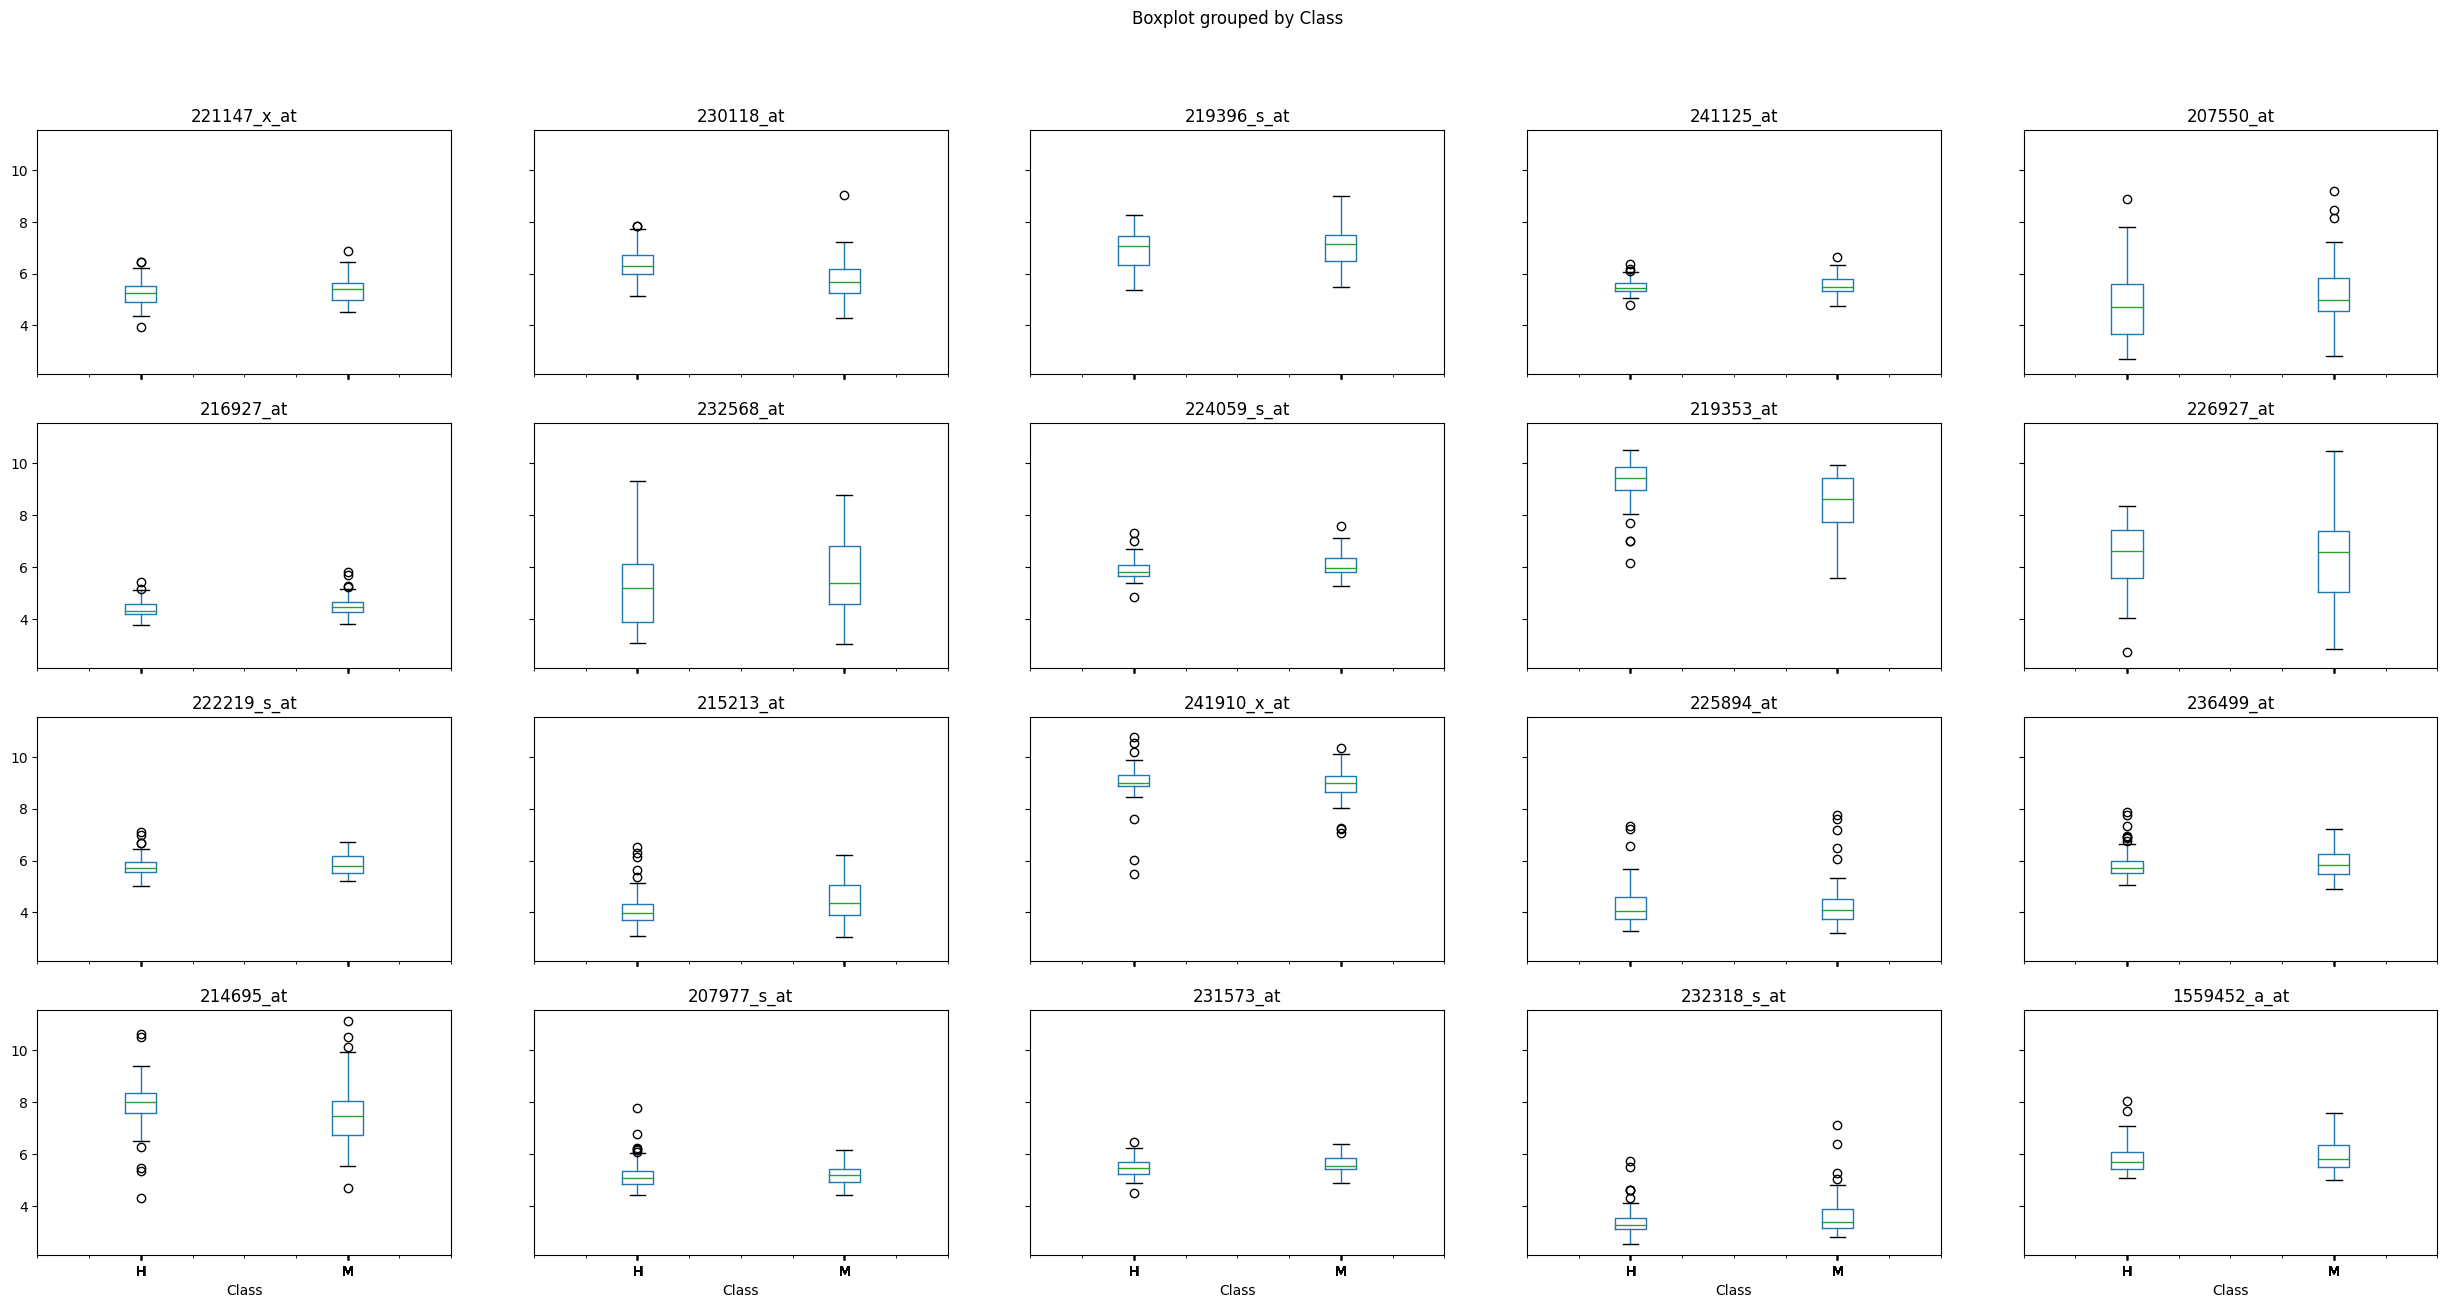

In [13]:
#Get columns
genes = sample.columns.values.tolist()
#Exclude Class column
genes = genes[:len(genes)-1]

#Convert to float
for gene in genes:
    sample[gene] = sample[gene].astype("float")

#Plot
boxplot = sample.boxplot(column=genes, by="Class", grid=False, layout=(4,5), figsize=(30,15))

#### b. WRS for differential expression (DE):
1. Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

In [14]:
df=df.transpose()

In [16]:
#Using the normal approximation:
#Amount of samples
N=99 
#Amount of samples labeled M
B= len(df[df["Class"]=="M"])
print(f"B: {B}")
RS_g= B*(N+1)/2
print(f"The expected sum of ranks of g's expression levels measured for samples labeled M is: {RS_g}")

B: 49
The expected sum of ranks of g's expression levels measured for samples labeled M is: 2450.0


2. Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

In [17]:
#Maximal values of RS(g) happens when all samples labeled M get the highest ranking
c=0
for i in range((N-B)+1,N+1):
    c = c + i
print(c)

3675


3. Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

Under the null model, the probability that the sum of ranks is equal to the maximal value happens when all samples labeled M get the highest ranking. Hence, there is only one scenario in which the samples are ordered that way over all possible combinations. Furthermore, the probability is:
$$P(RS(g)=c) = \frac{1}{{N \choose B}} = \frac{1}{{99 \choose 49}} =1.98\times10^{-29}$$

In [18]:
from math import comb
p1 = 1/comb(99,49)
print(f"P(RS(g)=c) = {p1}")

P(RS(g)=c) = 1.9823306042836678e-29


4. Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

To get $RS(g)=c-1$, the lowest ranked sample labeled M must be swapped with the highest ranked sample labeled H. This can only happen in one possible scenario and therefore the result is the same as the previous question:
$$P(RS(g)=c-1)=P(RS(g)=c) = \frac{1}{{N \choose B}} = \frac{1}{{99 \choose 49}}=1.98\times10^{-29} $$

On the other hand, to get $RS(g)=c-2$ the two lowest ranked samples labeled M will take a position on the lower ranking side and are therefore swapped with two highest ranked samples labeled H that take their place on the higher ranking side. Since there are two posible swaps that can be done we have:
$$P(RS(g)=c-2)=\frac{2}{{N \choose B}} = \frac{2}{{99 \choose 49}}=3.96\times10^{-29}$$

In [19]:
from math import comb
p2 = 2/comb(99,49)
print(f"P(RS(g)=c-2) = {p2}")

P(RS(g)=c-2) = 3.9646612085673355e-29


5. Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute the IQR for this distribution and present it on the plot with the histogram.

In [20]:
#Get a list of the genes to be analyzed
df_wrs = df.copy()
total_genes= df_wrs.columns.values.tolist()
total_genes = total_genes[1:]

In [21]:
def get_rs(data, gene):
    #Column of interest
    data2 = data[gene]
    #Rank that column
    ranked_column = data2.rank()
    #Get only M labels
    ranked_M = ranked_column[data["Class"]=="M"]
    #Calculate sum
    rs = ranked_M.sum()
    return rs

In [22]:
#Run get_rs for all genes
rs_list = []
for g in total_genes:
    rs_list.append(get_rs(df_wrs,g))

In [23]:
#Get IQR
rs_a = np.array(rs_list)
q1= np.quantile(rs_a,0.25)
q3 = np.quantile(rs_a,0.75)
iqr = q3-q1
print(f"The first quartile is {q1}")
print(f"The third quartile is {q3}")
print(f"The IQR is {iqr}")

The first quartile is 2297.0
The third quartile is 2625.0
The IQR is 328.0


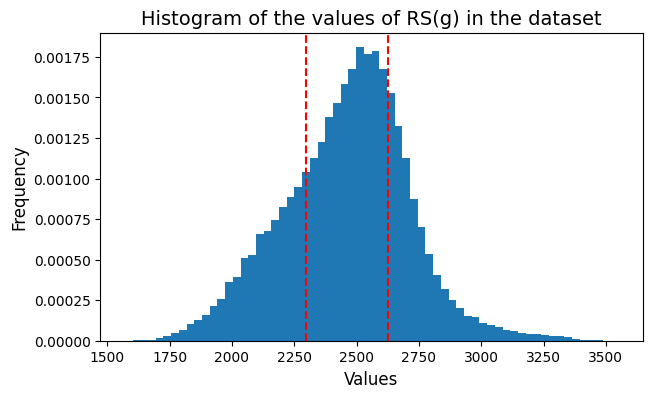

In [24]:
#np.histogram(rs_a)
plt.figure(figsize = (7, 4))
plt.hist(rs_a, bins=64, density=True)
plt.title("Histogram of the values of RS(g) in the dataset",fontsize=14)
plt.axvline(x = 2297, color = 'r', linestyle = 'dashed')
plt.axvline(x = 2625, color = 'r', linestyle = 'dashed')
plt.xlabel("Values",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.show()

#### c. Differential Expression:
The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.
Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [33]:
from scipy.stats import ranksums
from scipy.stats import ttest_ind

overexpressed_genes_wrs = 0
underexpressed_genes_wrs = 0
overexpressed_genes_t = 0
underexpressed_genes_t = 0

for g in total_genes:
    M = df[g][df["Class"]=="M"].astype(float)
    H = df[g][df["Class"]=="H"].astype(float)
    
    # Wilcoxon rank sum test
    # Overexpressed: more M than H in the gene at p-value<=0.07
    wrs_over = stats.ranksums(M, H, alternative="greater")[1]
    if wrs_over<0.07 or wrs_over==0.07:
        overexpressed_genes_wrs = overexpressed_genes_wrs + 1
        
    # Underexpressed: less M than H in the gene at p-value<=0.07
    wrs_under = stats.ranksums(M, H, alternative="less")[1]
    if wrs_under<0.07 or wrs_under==0.07:
        underexpressed_genes_wrs = underexpressed_genes_wrs + 1
        
    #Student t-test
    # Overexpressed: more M than H in the gene at p-value<=0.07
    t_over = stats.ttest_ind(M, H, alternative="greater")[1]
    if t_over<0.07 or t_over==0.07:
        overexpressed_genes_t = overexpressed_genes_t + 1
        
    # Underexpressed: less M than H in the gene at p-value<=0.07
    t_under = stats.ttest_ind(M, H, alternative="less")[1]
    if t_under<0.07 or t_under==0.07:
        underexpressed_genes_t = underexpressed_genes_t + 1    
        
print(f"Amount of overexpressed genes for WRS: {overexpressed_genes_wrs}")
print(f"Amount of underexpressed genes for WRS: {underexpressed_genes_wrs}")
print(f"Amount of overexpressed genes for Student t-test: {overexpressed_genes_t}")
print(f"Amount of underexpressed genes for Student t-test: {underexpressed_genes_t}")

Amount of overexpressed genes for WRS: 10787
Amount of underexpressed genes for WRS: 10667
Amount of overexpressed genes for Student t-test: 8517
Amount of underexpressed genes for Student t-test: 8639


#### d. Correlations:
Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.
1. Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.
2. Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?
3. Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.
4. What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression levels of genes, across a set of samples)?
5. What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.
6. What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

#### e. Plots and Conclusions of the DE and correlation analysis:
1. Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c. State, for each comparison, the number of genes, k, at which we observe with an FDR threshold of:
* a. 𝜏=0.05
* b. 𝜏=0.01
* c. 𝜏=0.005 <br>
If these events are not observed at any k>0, then make that statement.

2. For any given gene, g, consider the following set of p-values: